In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import  load_iris

In [35]:
print('Numpy Version:', np.__version__)
print('Pandas Version:', pd.__version__)
print('Sklearn Version:', sklearn.__version__)
print('Matplotlib Version:', matplotlib.__version__)


Numpy Version: 1.20.3
Pandas Version: 1.3.4
Sklearn Version: 1.0.2
Matplotlib Version: 3.4.3


In [36]:
conda install scikit-learn=1.0.2

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [37]:
iris =load_iris()
X = iris.data
y = iris.target

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [38]:
data = pd.DataFrame(X, columns= iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
data['Species'] = y
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
data.shape

(150, 5)

In [41]:
data['Species'].unique()

array([0, 1, 2])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# Exploratory Data Analysis

In [43]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


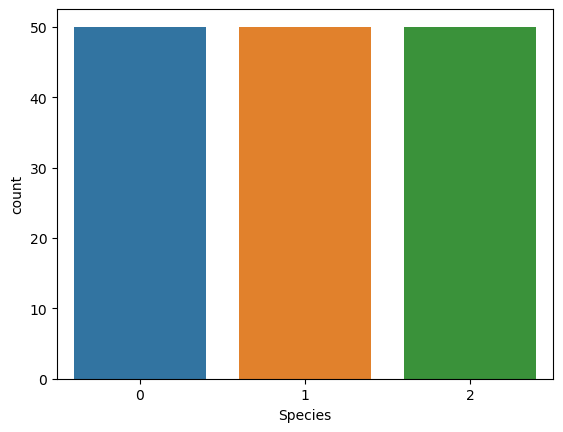

In [44]:
#check if data is skewed or not
sns. countplot(data['Species']);

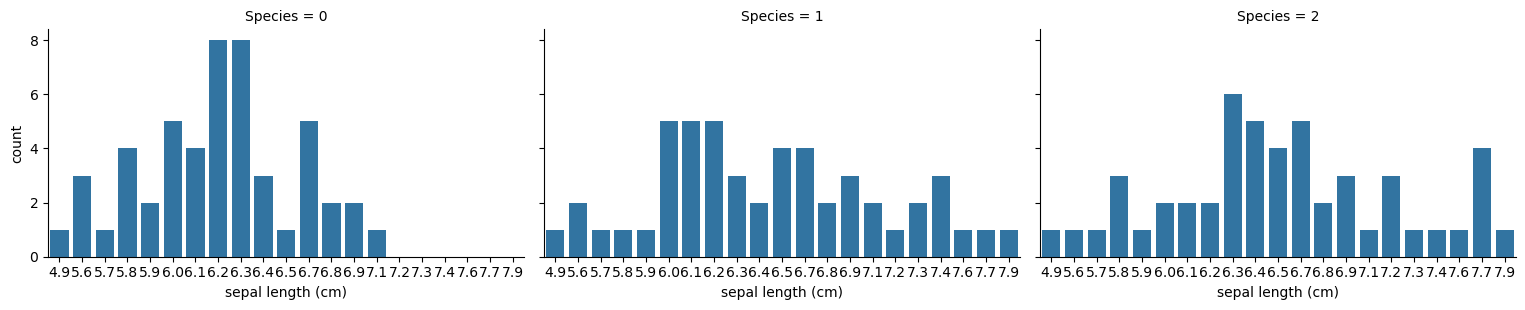

In [45]:
grid = sns.FacetGrid(data, col = 'Species', size = 3.2, aspect = 1.6)
grid.map(sns.countplot, 'sepal length (cm)');

# Model Building

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [48]:
#Importing libraries
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
#import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)


In [49]:
#preparing models and initializing
#using seed to maintain reproducibility
seed = 42
models = []
models.append((AdaBoostClassifier()))
models.append((LogisticRegression()))
models.append((KNeighborsClassifier()))
models.append((DecisionTreeClassifier()))
models.append((GaussianNB()))
models.append((RandomForestClassifier()))
models.append((GradientBoostingClassifier))
models.append((svm.SVC(kernel='linear')))
#models.append((xgb.XGBClassifier()))

In [50]:
# Creating a Dictionary of our models

models_dict = {"Logistic Regression" : LogisticRegression(max_iter = 100),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier(max_depth =1, random_state=42),
          'Decision Tree Classifier': DecisionTreeClassifier(max_depth= 1, random_state= 42),
          'Ada Boost Classifier': AdaBoostClassifier(),
          'Naive Bayes' : GaussianNB(),
          'Gradient Boosting': GradientBoostingClassifier(),
          'SVM': svm.SVC(kernel='rbf')
}



In [51]:
#Looping through each model providing each of them the training and testing and finally outputing their respective scores.
def fit_and_score(models, X_train, X_test, y_train, y_test):
   
    model_scores = {}
    for name,model in models_dict.items():
        model.fit(X_train, y_train)
        model_scores[name] = (model.score(X_test, y_test))
    return model_scores

In [52]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 1.0,
 'KNN': 1.0,
 'Random Forest': 1.0,
 'Decision Tree Classifier': 0.6333333333333333,
 'Ada Boost Classifier': 1.0,
 'Naive Bayes': 1.0,
 'Gradient Boosting': 1.0,
 'SVM': 1.0}

In [53]:
GRB_clf = RandomForestClassifier(random_state = 42)
GRB_clf.fit(X_train, y_train)
  
# predicting on the test dataset
y_pred = GRB_clf.predict(X_test)
  
# finding out the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

1.0

In [54]:
GRB_clf.predict([[1.2, 1.5, 1.6, 1.2]])

array([0])

In [55]:
GRB_clf.predict([[7.0, 3.2, 4.7, 1.4]])

array([1])

## Saving Trained model

In [56]:
# pickling the model
import pickle
pickle_out = open("IRIS_model.pkl", "wb")
pickle.dump(GRB_clf, pickle_out)
pickle_out.close()


In [57]:
#loading in the model to predict on the data
pickle_in = open('IRIS_model.pkl', 'rb')
load_model= pickle.load(pickle_in)

## Method 1 of using a pickled model for prediction

In [58]:
input_data = (7.0, 3.2, 4.7, 1.4)

# changing the input_data to numpy array
input_data = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1,-1)

prediction = load_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('Predicted flower is Setosa')
elif (prediction[0]== 1):
    print('Predicted flower is Versicolour')
else:
    print('Predicted flower is Virginica')

[1]
Predicted flower is Versicolour


In [59]:
type(input_data_reshaped)

numpy.ndarray

In [60]:
type(prediction)

numpy.ndarray

## Method 2 of using a pickled model for prediction

In [61]:
input_data2 = ([[5.9, 3.0, 5.1, 1.8]])


prediction2 = load_model.predict(input_data2)
print(prediction)

if (prediction2[0] == 0):
    print('Predicted flower is Setosa')
elif (prediction2[0]== 1):
    print('Predicted flower is Versicolour')
else:
    print('Predicted flower is Virginica')

[1]
Predicted flower is Virginica


In [62]:
type(input_data2)

list

In [63]:
type(prediction2)

numpy.ndarray